In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# BCE classifier

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
from pytorch_inferno.model_wrapper import ModelWrapper
from pytorch_inferno.callback import *
from pytorch_inferno.data import get_paper_data
from pytorch_inferno.plotting import *
from pytorch_inferno.inference import *
from pytorch_inferno.utils import *

from fastcore.all import partialler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from typing import *
from collections import OrderedDict

import torch.nn as nn
from torch import optim
import torch
from torch import Tensor
from torch import autograd

In [ ]:
net = nn.Sequential(nn.Linear(3,100),  nn.ReLU(),
                    nn.Linear(100,100),nn.ReLU(),
                    nn.Linear(100,1),  nn.Sigmoid())
init_net(net)

In [ ]:
model = ModelWrapper(net)

data, test = get_paper_data(200000, bm=0, bs=32, n_test=1000000)

In [ ]:
model.fit(200, data=data, opt=partialler(optim.SGD,lr=2e-3), loss=nn.BCELoss(),
          cbs=[LossTracker(),EarlyStopping(5)])

model.save('weights/BCE_Test.h5')

Train: 0.4018480720949173 Valid: 0.3594779955911636
Train: 0.34716830669283866 Valid: 0.340153435921669
Train: 0.3390784068202972 Valid: 0.33838851624011995
Train: 0.3377014762532711 Valid: 0.33719482627391817
Train: 0.33709466850757597 Valid: 0.3365138725948334
Train: 0.3365791872537136 Valid: 0.3358933045434952
Train: 0.33617490021586416 Valid: 0.3357136068534851
Train: 0.33584546636343005 Valid: 0.33539333289623263
Train: 0.3356798021280766 Valid: 0.33524129708766937
Train: 0.3353859315288067 Valid: 0.33501362107276916
Train: 0.33525374916315076 Valid: 0.3352512472009659
Train: 0.3349605622923374 Valid: 0.3352416910648346
Train: 0.33496752428412435 Valid: 0.33435937875270844
Train: 0.33472886725783346 Valid: 0.33488793521881105
Train: 0.3346269887781143 Valid: 0.33450447449684145
Train: 0.33448157294869424 Valid: 0.3344162035560608
Train: 0.3344117122745514 Valid: 0.3344201789665222
Train: 0.3342973936450481 Valid: 0.3352356071138382
Early stopping


In [ ]:
model.load('weights/BCE_Test.h5')

## BM 0

In [ ]:
preds = model.predict(test)

In [ ]:
preds

array([[0.79271704],
       [0.9064037 ],
       [0.9042783 ],
       ...,
       [0.9089589 ],
       [0.04764885],
       [0.0218951 ]], dtype=float32)

In [ ]:
df = pd.DataFrame({'pred':preds.squeeze()})
df['gen_target'] = test.dataset.y
df.head()

,pred,gen_target
0,0.792717,1.0
1,0.906404,1.0
2,0.904278,1.0
3,0.837684,1.0
4,0.760696,1.0


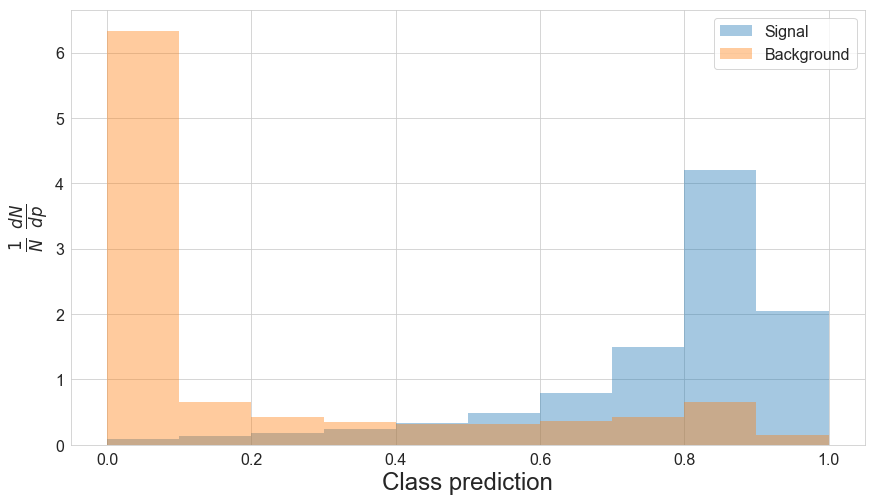

In [ ]:
plot_preds(df)

In [ ]:
bin_preds(df)

In [ ]:
df.head()

,pred,gen_target,pred_bin
0,0.792717,1.0,7
1,0.906404,1.0,9
2,0.904278,1.0,9
3,0.837684,1.0,8
4,0.760696,1.0,7


In [ ]:
f_s,f_b = get_shape(df,1),get_shape(df,0)

In [ ]:
f_s.sum(), f_b.sum()

(tensor(1.), tensor(1.0000))

In [ ]:
f_s, f_b

(tensor([0.0088, 0.0137, 0.0183, 0.0243, 0.0333, 0.0483, 0.0787, 0.1496, 0.4199,
         0.2052]),
 tensor([0.6336, 0.0652, 0.0428, 0.0351, 0.0323, 0.0318, 0.0358, 0.0429, 0.0658,
         0.0147]))

In [ ]:
asimov = (50*f_s)+(1000*f_b)

In [ ]:
asimov, asimov.sum()

(tensor([634.0380,  65.8655,  43.6966,  36.3629,  33.9457,  34.2620,  39.7246,
          50.3725,  86.7849,  24.9473]), tensor(1050.))

In [ ]:
n = 1050
x = np.linspace(20,80,61)
y = np.zeros_like(x)
for i,m in enumerate(x):
    pois = torch.distributions.Poisson((m*f_s)+(1000*f_b))
    y[i] = -pois.log_prob(asimov).sum()
y

array([31.65486145, 31.49612808, 31.34383392, 31.19793701, 31.05811691,
       30.92499542, 30.79772949, 30.67637634, 30.5611496 , 30.45176315,
       30.34845734, 30.25031281, 30.15811539, 30.0714798 , 29.990345  ,
       29.91484833, 29.84416199, 29.77899551, 29.71930695, 29.66403198,
       29.6143074 , 29.57011414, 29.53033829, 29.49552917, 29.46543884,
       29.4401741 , 29.41963196, 29.40378952, 29.39226532, 29.38574982,
       29.3834877 , 29.38576508, 29.39213562, 29.40308762, 29.41853333,
       29.43807602, 29.46151733, 29.48942566, 29.5214119 , 29.55770111,
       29.59781265, 29.64160156, 29.68958282, 29.74175644, 29.79753113,
       29.85684967, 29.92024612, 29.98730469, 30.05839157, 30.13257599,
       30.21070099, 30.29270554, 30.37792206, 30.46628189, 30.55898285,
       30.65479279, 30.75389481, 30.8564682 , 30.96238708, 31.07162094,
       31.18417358])

In [ ]:
y_tf2 = np.array([31.626238,31.466385,31.313095,31.166267,31.025808,30.891619,30.76361
,30.641693,30.525778,30.415783,30.31162,30.213215,30.120483,30.033348
,29.951736,29.875574,29.804789,29.739307,29.679066,29.623993,29.574026
,29.5291,29.489151,29.454117,29.423939,29.398558,29.377914,29.361954
,29.35062,29.343859,29.341618,29.343842,29.350483,29.36149,29.376812
,29.396404,29.420216,29.448202,29.480318,29.516518,29.556757,29.600994
,29.649185,29.70129,29.757267,29.817076,29.88068,29.948036,30.019108
,30.093859,30.17225,30.25425,30.339819,30.42892,30.521524,30.617598
,30.7171,30.820007,30.926281,31.035892,31.148808], dtype='float32')

In [ ]:
y_tf2-y_tf2.min()

array([2.2846203e+00, 2.1247673e+00, 1.9714775e+00, 1.8246498e+00,
       1.6841908e+00, 1.5500011e+00, 1.4219933e+00, 1.3000755e+00,
       1.1841602e+00, 1.0741653e+00, 9.7000313e-01, 8.7159729e-01,
       7.7886581e-01, 6.9173050e-01, 6.1011887e-01, 5.3395653e-01,
       4.6317101e-01, 3.9768982e-01, 3.3744812e-01, 2.8237534e-01,
       2.3240852e-01, 1.8748283e-01, 1.4753342e-01, 1.1249924e-01,
       8.2321167e-02, 5.6940079e-02, 3.6296844e-02, 2.0336151e-02,
       9.0026855e-03, 2.2411346e-03, 0.0000000e+00, 2.2239685e-03,
       8.8653564e-03, 1.9872665e-02, 3.5194397e-02, 5.4786682e-02,
       7.8598022e-02, 1.0658455e-01, 1.3870049e-01, 1.7490005e-01,
       2.1513939e-01, 2.5937653e-01, 3.0756760e-01, 3.5967255e-01,
       4.1564941e-01, 4.7545815e-01, 5.3906250e-01, 6.0641861e-01,
       6.7749023e-01, 7.5224113e-01, 8.3063316e-01, 9.1263199e-01,
       9.9820137e-01, 1.0873032e+00, 1.1799068e+00, 1.2759800e+00,
       1.3754826e+00, 1.4783897e+00, 1.5846634e+00, 1.6942749e

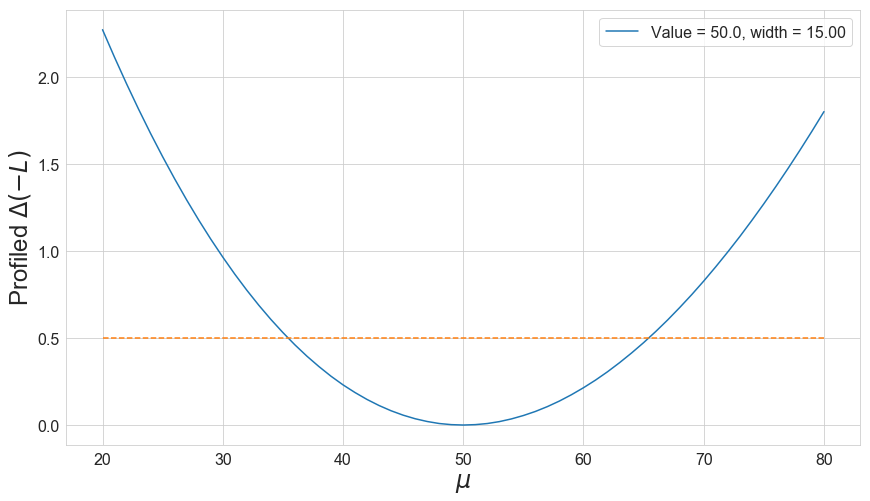

In [ ]:
plot_likelihood(y-y.min())

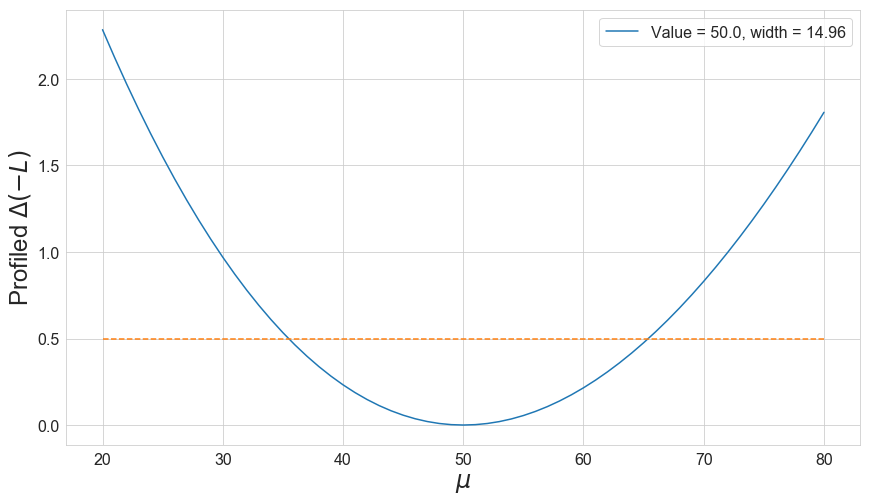

In [ ]:
plot_likelihood(y_tf2-y_tf2.min())

# Nuisances - via interpolation

In [ ]:
bkg = test.dataset.x[test.dataset.y.squeeze() == 0]
assert len(bkg) == 500000

In [ ]:
b_shapes = get_paper_syst_shapes(bkg, df, model=model)

Running: r=-0.2


Running: r=0


Running: r=0.2


Running: l=2.5


Running: l=3


Running: l=3.5


In [ ]:
df

,pred,gen_target,pred_bin,pred_-0.2_3,pred_-0.2_3_bin,pred_0_3,pred_0_3_bin,pred_0.2_3,pred_0.2_3_bin,pred_0_2.5,pred_0_2.5_bin,pred_0_3.5,pred_0_3.5_bin
0,0.792717,1.0,7,0.792717,7,0.792717,7,0.792717,7,0.792717,7,0.792717,7
1,0.906404,1.0,9,0.906404,9,0.906404,9,0.906404,9,0.906404,9,0.906404,9
2,0.904278,1.0,9,0.904278,9,0.904278,9,0.904278,9,0.904278,9,0.904278,9
3,0.837684,1.0,8,0.837684,8,0.837684,8,0.837684,8,0.837684,8,0.837684,8
4,0.760696,1.0,7,0.760696,7,0.760696,7,0.760696,7,0.760696,7,0.760696,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.073247,0.0,0,0.101737,1,0.073247,0,0.051698,0,0.069899,0,0.076752,0
999996,0.000056,0.0,0,0.000065,0,0.000056,0,0.000048,0,0.000056,0,0.000057,0
999997,0.908959,0.0,9,0.894768,8,0.908959,9,0.910017,9,0.901048,9,0.915415,9
999998,0.047649,0.0,0,0.067033,0,0.047649,0,0.033708,0,0.045573,0,0.049814,0


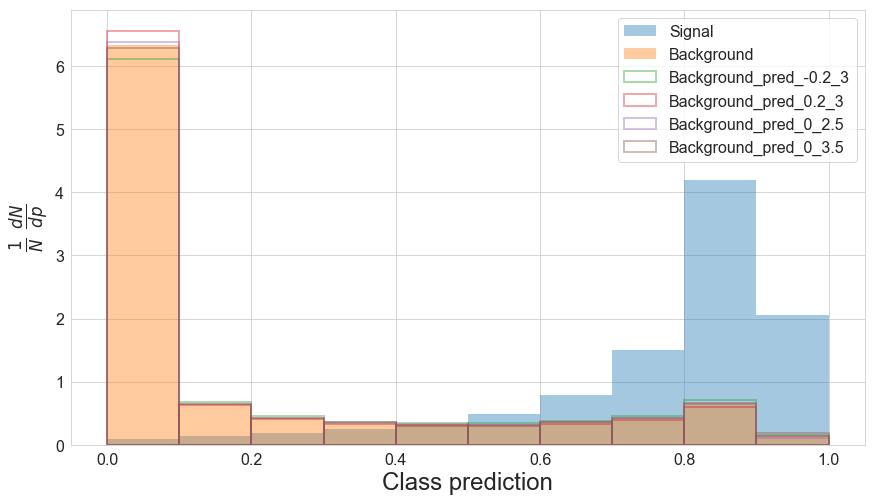

In [ ]:
plot_preds(df, pred_names=['pred', 'pred_-0.2_3', 'pred_0.2_3', 'pred_0_2.5', 'pred_0_3.5'])

In [ ]:
b_shapes['f_b_nom']

tensor([0.6336, 0.0652, 0.0428, 0.0351, 0.0323, 0.0318, 0.0358, 0.0429, 0.0658,
        0.0147])

In [ ]:
b_shapes['f_b_up']

tensor([[0.6562, 0.0628, 0.0405, 0.0337, 0.0300, 0.0303, 0.0334, 0.0394, 0.0604,
         0.0134],
        [0.6287, 0.0653, 0.0429, 0.0353, 0.0321, 0.0320, 0.0357, 0.0430, 0.0659,
         0.0190]])

In [ ]:
b_shapes['f_b_dw']

tensor([[0.6119, 0.0673, 0.0449, 0.0367, 0.0339, 0.0339, 0.0381, 0.0459, 0.0713,
         0.0161],
        [0.6385, 0.0650, 0.0426, 0.0352, 0.0322, 0.0321, 0.0354, 0.0427, 0.0654,
         0.0107]])

In [ ]:
f_s

tensor([0.0088, 0.0137, 0.0183, 0.0243, 0.0333, 0.0483, 0.0787, 0.1496, 0.4199,
        0.2052])

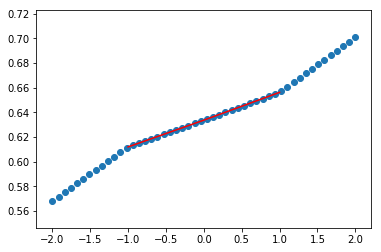

In [ ]:
i = 0
d = b_shapes['f_b_dw'][0][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][0][i]
interp = []
rs = np.linspace(-2,2)
for r in rs: interp.append(interp_shape(Tensor((r,0))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(rs, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

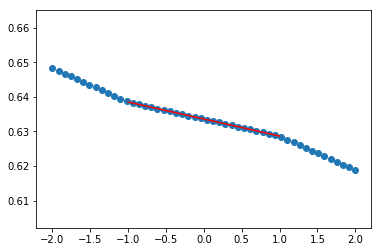

In [ ]:
i = 0
d = b_shapes['f_b_dw'][1][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][1][i]
interp = []
ls = np.linspace(-2,2)
for l in ls: interp.append(interp_shape(Tensor((0,l))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(ls, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

In [ ]:
b_shapes['f_b_nom']

tensor([0.6336, 0.0652, 0.0428, 0.0351, 0.0323, 0.0318, 0.0358, 0.0429, 0.0658,
        0.0147])

In [ ]:
alpha = Tensor((1,0))[None,:]
interp_shape(alpha, **b_shapes).squeeze()

tensor([0.6562, 0.0628, 0.0405, 0.0337, 0.0300, 0.0303, 0.0334, 0.0394, 0.0604,
        0.0134])

In [ ]:
b_shapes['f_b_up']

tensor([[0.6562, 0.0628, 0.0405, 0.0337, 0.0300, 0.0303, 0.0334, 0.0394, 0.0604,
         0.0134],
        [0.6287, 0.0653, 0.0429, 0.0353, 0.0321, 0.0320, 0.0357, 0.0430, 0.0659,
         0.0190]])

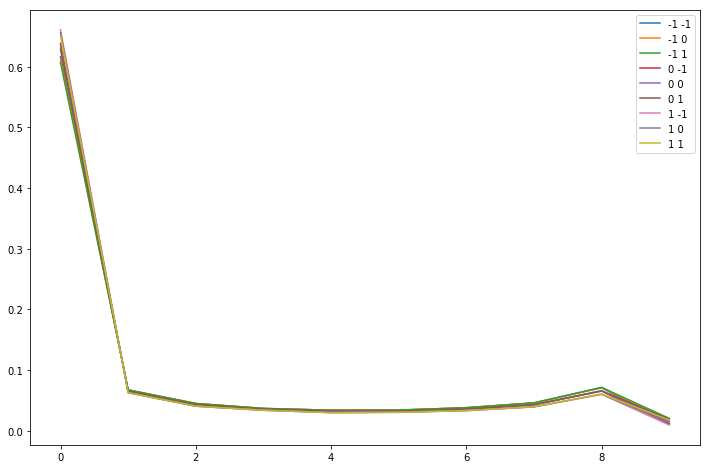

In [ ]:
fig = plt.figure(figsize=(12,8))
for r in [-1,0,1]:
    for l in [-1,0,1]:
        alpha = Tensor((r,l))[None,:]
        s = interp_shape(alpha, **b_shapes).squeeze()
        plt.plot(s, label=f'{r} {l}')
plt.legend()

# Newton

In [ ]:
profiler = partialler(calc_profile, n=1050, mu_scan=torch.linspace(20,80,61), true_mu=50)

## BM 1
r free, l fixed

In [ ]:
bm1_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                            ('f_b_up',  b_shapes['f_b_up'][0][None,:]),
                            ('f_b_dw',  b_shapes['f_b_dw'][0][None,:])])

In [ ]:
bm1_b_shapes['f_b_up'].shape

torch.Size([1, 10])

In [ ]:
nll,_ = profiler(f_s=f_s, n_steps=100, **bm1_b_shapes)

In [ ]:
nll = to_np(nll)

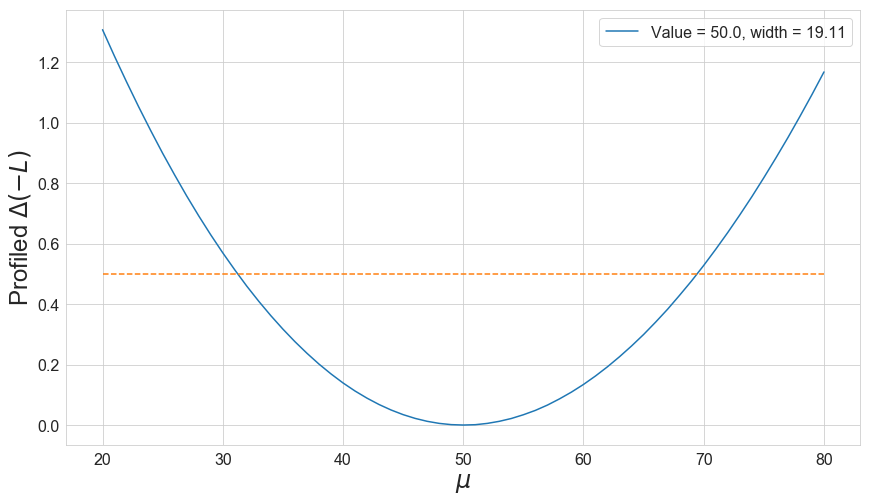

In [ ]:
plot_likelihood(nll-nll.min())

## BM 1l
r fixed, l free

In [ ]:
bm1l_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                             ('f_b_up',  b_shapes['f_b_up'][1][None,:]),
                             ('f_b_dw',  b_shapes['f_b_dw'][1][None,:])])

In [ ]:
nll,_ = profiler(f_s=f_s, n_steps=100, **bm1l_b_shapes)

In [ ]:
nll = to_np(nll)

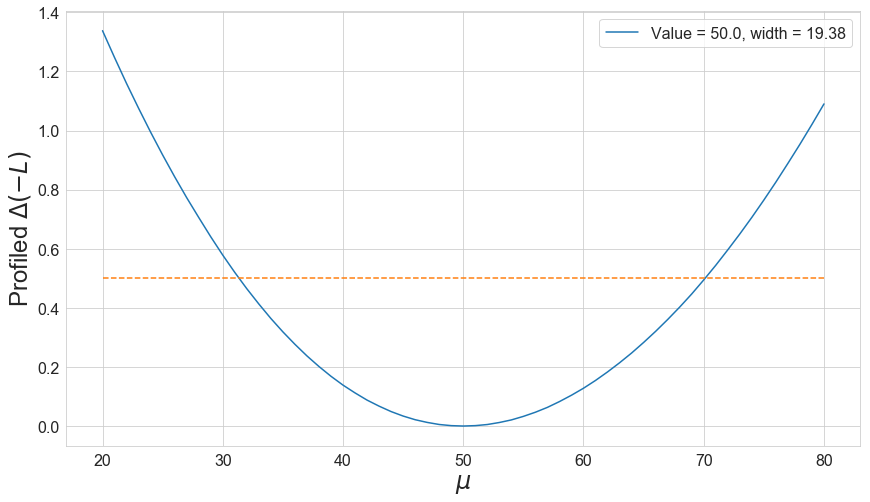

In [ ]:
plot_likelihood(nll-nll.min())

## BM 2

In [ ]:
nll,_ = profiler(f_s=f_s, n_steps=100, **b_shapes)

In [ ]:
nll = to_np(nll)

In [ ]:
nll, nll.min()

(array([30.279495, 30.218811, 30.16087 , 30.10492 , 30.051498, 29.999615,
        29.95055 , 29.903187, 29.858376, 29.8154  , 29.774574, 29.735527,
        29.699043, 29.66452 , 29.631985, 29.601387, 29.572884, 29.546776,
        29.522194, 29.499866, 29.479725, 29.461025, 29.444752, 29.430286,
        29.417564, 29.406933, 29.398605, 29.392208, 29.386906, 29.38412 ,
        29.383488, 29.384384, 29.386894, 29.391945, 29.398518, 29.40678 ,
        29.417103, 29.429028, 29.443352, 29.45868 , 29.475857, 29.495415,
        29.516937, 29.539387, 29.563946, 29.590721, 29.618622, 29.64899 ,
        29.680443, 29.713615, 29.749111, 29.78584 , 29.824432, 29.864471,
        29.906425, 29.950027, 29.995914, 30.043007, 30.092506, 30.142632,
        30.194992], dtype=float32), 29.383488)

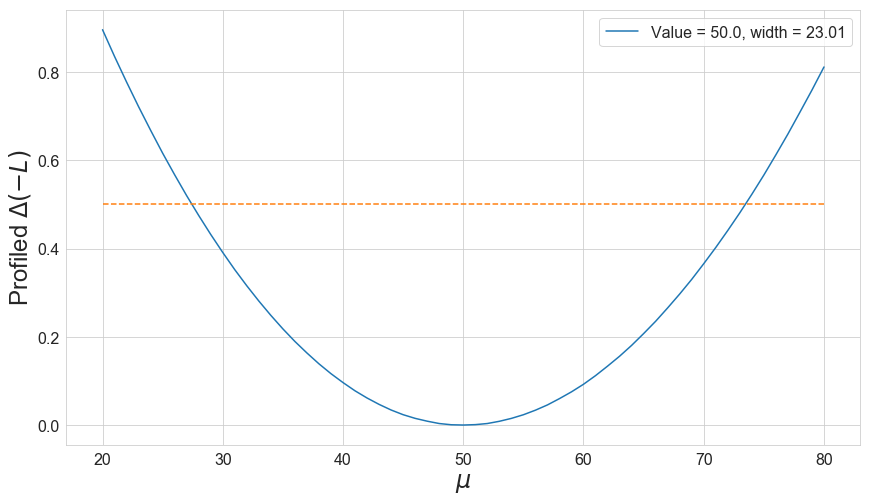

In [ ]:
plot_likelihood(nll-nll.min())